# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=rikitea
Processing Record 2 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=bathsheba
Processing Record 3 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=kapaa
Processing Record 4 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=katsuura
Processing Record 5 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=new norfolk
City not found. Skipping...
Processing Record 6 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=busselton
Processing Record 7 | Port Alfred
http://api.openweathe

Processing Record 56 | Warrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=warrington
Processing Record 57 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=sao filipe
Processing Record 58 | Horasan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=horasan
City not found. Skipping...
Processing Record 59 | Shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=shingu
City not found. Skipping...
Processing Record 60 | Krutikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=krutikha
Processing Record 61 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=port elizabeth
Processing Record 62 | Inhambane
http://api.openweathermap.org/dat

Processing Record 112 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=lata
Processing Record 113 | Leiva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=leiva
Processing Record 114 | Whitianga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=whitianga
Processing Record 115 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=iqaluit
City not found. Skipping...
Processing Record 116 | Milledgeville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=milledgeville
Processing Record 117 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=port lincoln
Processing Record 118 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 168 | Bathurst
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=bathurst
City not found. Skipping...
Processing Record 169 | Takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=takoradi
Processing Record 170 | Lere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=lere
Processing Record 171 | Malyye Derbety
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=malyye derbety
Processing Record 172 | Izumo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=izumo
Processing Record 173 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=dingle
Processing Record 174 | Sanmenxia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6

Processing Record 223 | Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=comodoro rivadavia
Processing Record 224 | Noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=noumea
Processing Record 225 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=geraldton
Processing Record 226 | Douglas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=douglas
Processing Record 227 | Luganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=luganville
Processing Record 228 | Aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=aswan
Processing Record 229 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb2

Processing Record 279 | Lethem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=lethem
Processing Record 280 | La Cruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=la cruz
Processing Record 281 | San Roque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=san roque
Processing Record 282 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=pangnirtung
Processing Record 283 | Darhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=darhan
Processing Record 284 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=lavrentiya
Processing Record 285 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb377

Processing Record 335 | Ust-Kuyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=ust-kuyga
Processing Record 336 | Sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=sorong
City not found. Skipping...
Processing Record 337 | Harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=harper
Processing Record 338 | Kattivakkam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=kattivakkam
City not found. Skipping...
Processing Record 339 | Banda Aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=banda aceh
Processing Record 340 | Olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=olinda
Processing Record 341 | Acari
http://api.openweathermap.org/data/2.5/weath

Processing Record 391 | Zonguldak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=zonguldak
Processing Record 392 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=namibe
Processing Record 393 | Miri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=miri
City not found. Skipping...
Processing Record 394 | Akmene
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=akmene
Processing Record 395 | Abu Samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=abu samrah
Processing Record 396 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=kahului
Processing Record 397 | Sayyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb2

Processing Record 447 | Papar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=papar
Processing Record 448 | Hurricane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=hurricane
Processing Record 449 | Kargasok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=kargasok
Processing Record 450 | Viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=viedma
City not found. Skipping...
Processing Record 451 | Ljubljana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=ljubljana
Processing Record 452 | Klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=klaksvik
Processing Record 453 | Polunochnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727

Processing Record 503 | Deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=deputatskiy
City not found. Skipping...
Processing Record 504 | Along
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=along
Processing Record 505 | Moree
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=moree
Processing Record 506 | Simplicio Mendes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=simplicio mendes
Processing Record 507 | Zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=zyryanka
Processing Record 508 | Wilmington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=wilmington
Processing Record 509 | Ardahan
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 558 | General Pico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=general pico
Processing Record 559 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=port hardy
City not found. Skipping...
Processing Record 560 | Santa Maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=santa maria
Processing Record 561 | Penha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=penha
Processing Record 562 | Tandil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=tandil
City not found. Skipping...
Processing Record 563 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=727cf6bc2c73eb22f81d0737eb3778f3&q=fortuna
Processing Record 564 | Port Hedland
http://api.openweathermap.org/d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          581
Cloudiness    581
Country       581
Date          581
Humidity      581
Lat           581
Lng           581
Max Temp      581
Wind Speed    581
dtype: int64

In [6]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,100,PF,1567366752,88,-23.12,-134.97,71.72,7.18
1,Bathsheba,40,BB,1567366753,66,13.22,-59.52,87.80,11.41
2,Kapaa,75,US,1567366754,66,22.08,-159.32,87.80,11.41
3,Katsuura,40,JP,1567366756,94,33.93,134.50,73.99,10.29
4,New Norfolk,20,AU,1567366757,81,-42.78,147.06,46.40,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

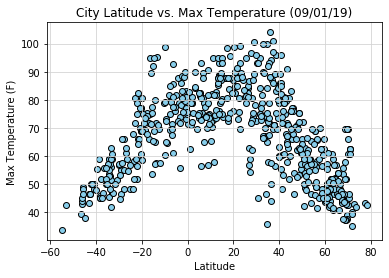

In [14]:
plt.scatter(weather_data["Lat"],weather_data["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (09/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs.Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

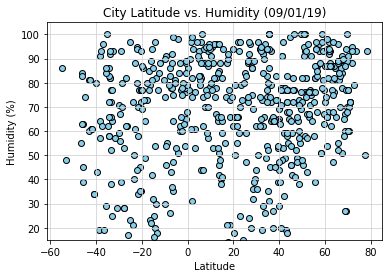

In [18]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (09/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs.Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

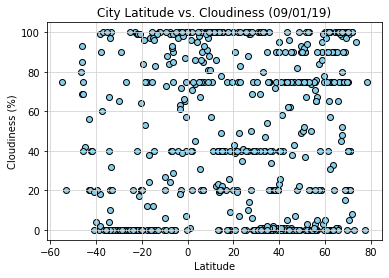

In [19]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (09/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs.Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

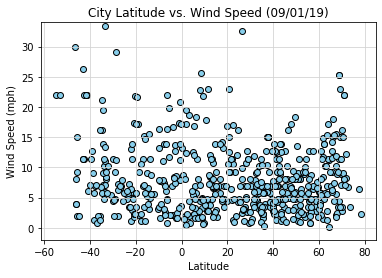

In [20]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (09/01/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs.Wind.png")
plt.show()